Analyzing Employee Trends to Reduce Attrition Problem: Our company is experiencing a concerning level of employee churn. We need to understand the underlying reasons for this attrition to develop effective retention strategies.

Solution: Data is our key! By analyzing employee trends, we can identify patterns and factors contributing to departures.

What to Explore:

Demographics: Are specific age groups, departments, or job roles more likely to leave?
Performance: Is there a correlation between performance ratings and attrition?
Engagement: Are disengaged employees more likely to exit? Analyze surveys, pulse checks, and exit interviews.
Compensation & Benefits: Are certain pay scales or benefit offerings associated with higher attrition?
Internal Mobility: Do employees seek opportunities within the company before leaving?
External Factors: Are industry trends or competitor offerings influencing our attrition rate?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_recall_curve, roc_curve


In [2]:

data_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data_df.shape

(1470, 35)

In [4]:
data_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#the minimum age is 18,so 'Over18' column can be dropped
#The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column
#The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well
#The 'EmployeeNumber' column is merely the number for each employee, we dont need the column

In [5]:
data_df.describe().round(0).transpose()


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,37.0,9.0,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.0,404.0,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.0,8.0,1.0,2.0,7.0,14.0,29.0
Education,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,1025.0,602.0,1.0,491.0,1020.0,1556.0,2068.0
EnvironmentSatisfaction,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0
HourlyRate,1470.0,66.0,20.0,30.0,48.0,66.0,84.0,100.0
JobInvolvement,1470.0,3.0,1.0,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0


In [6]:
data_df.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
#most employees r sales executive, more male employees. RnD has the most employees, more employees r married

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#All columns has 1470 non-null entries, no missing values

Text(0, 0.5, 'Attrition Rate')

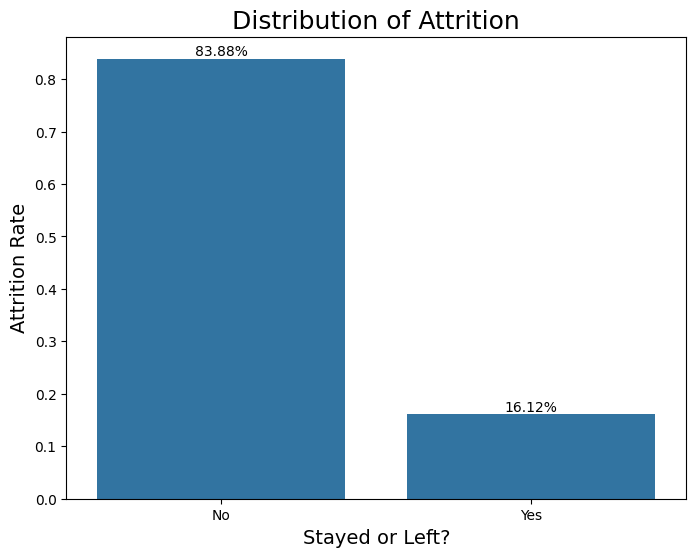

In [10]:
#we are doing binary classification problem here. Our target variable is Attrition. 
#First look at the distribution of attrition using the bar plot below

attr_rate=data_df['Attrition'].value_counts(normalize=True)

plt.figure(figsize=(8,6))

b=sns.barplot(x=data_df.Attrition.value_counts(normalize=True).index, y=data_df.Attrition.value_counts(normalize=True))

for p in b.patches:
    b.annotate(f'{p.get_height() * 100:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
b.axes.set_title("Distribution of Attrition",fontsize=18)
b.set_xlabel("Stayed or Left?",fontsize=14)
b.set_ylabel("Attrition Rate",fontsize=14)
#b.bar_label(b.containers[0])


#As can be seen from the figure we have imbalance data set with 83.88% of employee choose to stay (Attrition=No), while the remaining 16.12% chose to leave the company (Attrition=Yes)

#As expected, the 'Attrition' column shows a significant class imbalance 83.88% Attrition='No' and 16.12% Attrition='Yes'. 
#The imbalance should be addressed prior to model training to prevent overemphasis towards Attrition='No' class when our study focus is on the employees who attritition='Yes'.

attr_rate.head()

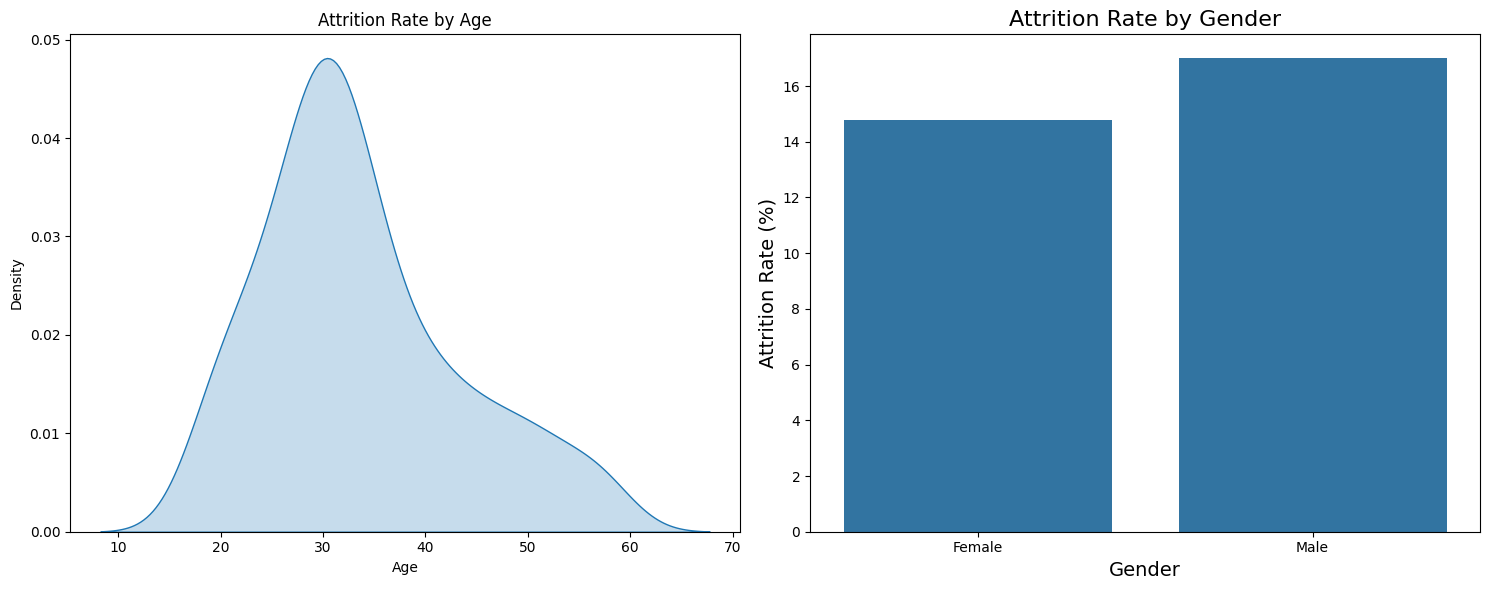

In [11]:
data_df1=data_df.copy()
df_attrition = data_df1[data_df1['Attrition'] == 'Yes']
# function to calculate attrition rate
def calculate_attrition_rate(df, column):
    attrition_counts = data_df1.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# Plot 1: KDE plot of Attrition Rate by Age 
sns.kdeplot(data=df_attrition, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition Rate by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# Plot 2: Bar plot of Attrition Rate by Gender 
attrition_rate_df = calculate_attrition_rate(data_df1, 'Gender')
sns.barplot(data=attrition_rate_df, x='Gender', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Gender',fontsize=16)
axes[1].set_xlabel('Gender',fontsize=14)
axes[1].set_ylabel('Attrition Rate (%)',fontsize=14)

plt.tight_layout()
plt.show()

Attrition by Age:

Younger employees, especially those in the 30-35 age group, appear to be more likely than other age groups to leave a company. This could be due to a number of factors, including a search for new experiences, dissatisfaction with salary or career path, or a more attractive job offer elsewhere. Older employees tend to have greater job stability. This may be due to a number of factors, such as a higher level of commitment to the company, the difficulty of finding a new job at an older age, or the existence of mandatory retirement benefits. Attrition by Gender There is a significant difference in turnover rates between men and women. Male employees tend to leave more often than female employees. However, this could be due to the imbalance in the sample of both groups.

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

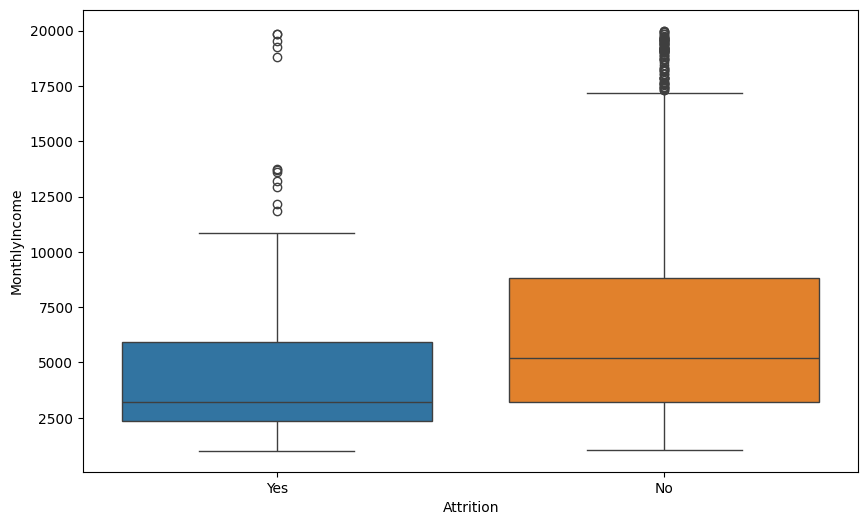

In [12]:
# Plot 1: Bobplot of Attrition Rate by Monthly Income

plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',x ='Attrition',data=data_df1,hue="Attrition")

In [13]:
#obviouly lower monthly income will lead to higher attrition rate

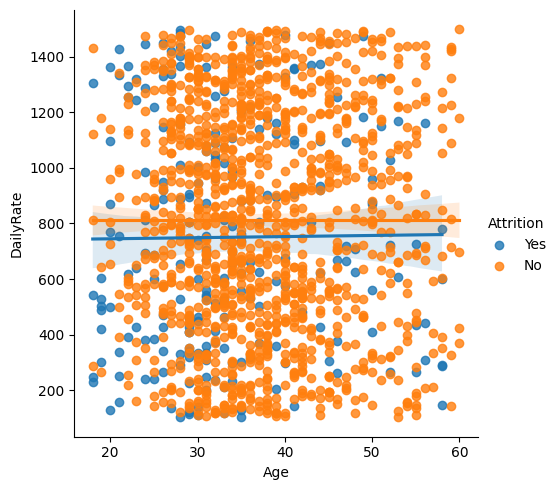

In [14]:
sns.lmplot(x = 'Age',y = 'DailyRate',hue = 'Attrition',data=data_df1)


In [15]:
#cant see the pattern clearly here

In [16]:
#data_df1=data_df.copy()
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

data_df1['Education_cat'] = data_df1['Education'].replace(education_map)
data_df1['Education_cat']

0             College
1       Below College
2             College
3              Master
4       Below College
            ...      
1465          College
1466    Below College
1467         Bachelor
1468         Bachelor
1469         Bachelor
Name: Education_cat, Length: 1470, dtype: object

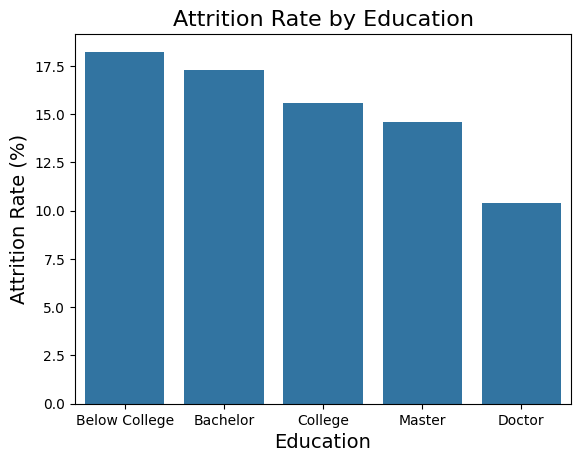

In [17]:
attrition_rate_df = calculate_attrition_rate(data_df1, 'Education_cat')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='Education_cat', y='AttritionRate')
plt.title(f'Attrition Rate by Education',fontsize=16)
plt.xlabel('Education',fontsize=14)
plt.ylabel('Attrition Rate (%)',fontsize=14)

plt.show()

#attrition rate breakdown by education level shows highest education (doctor) has the lowest attrion rate, below college has the highest attrition rate

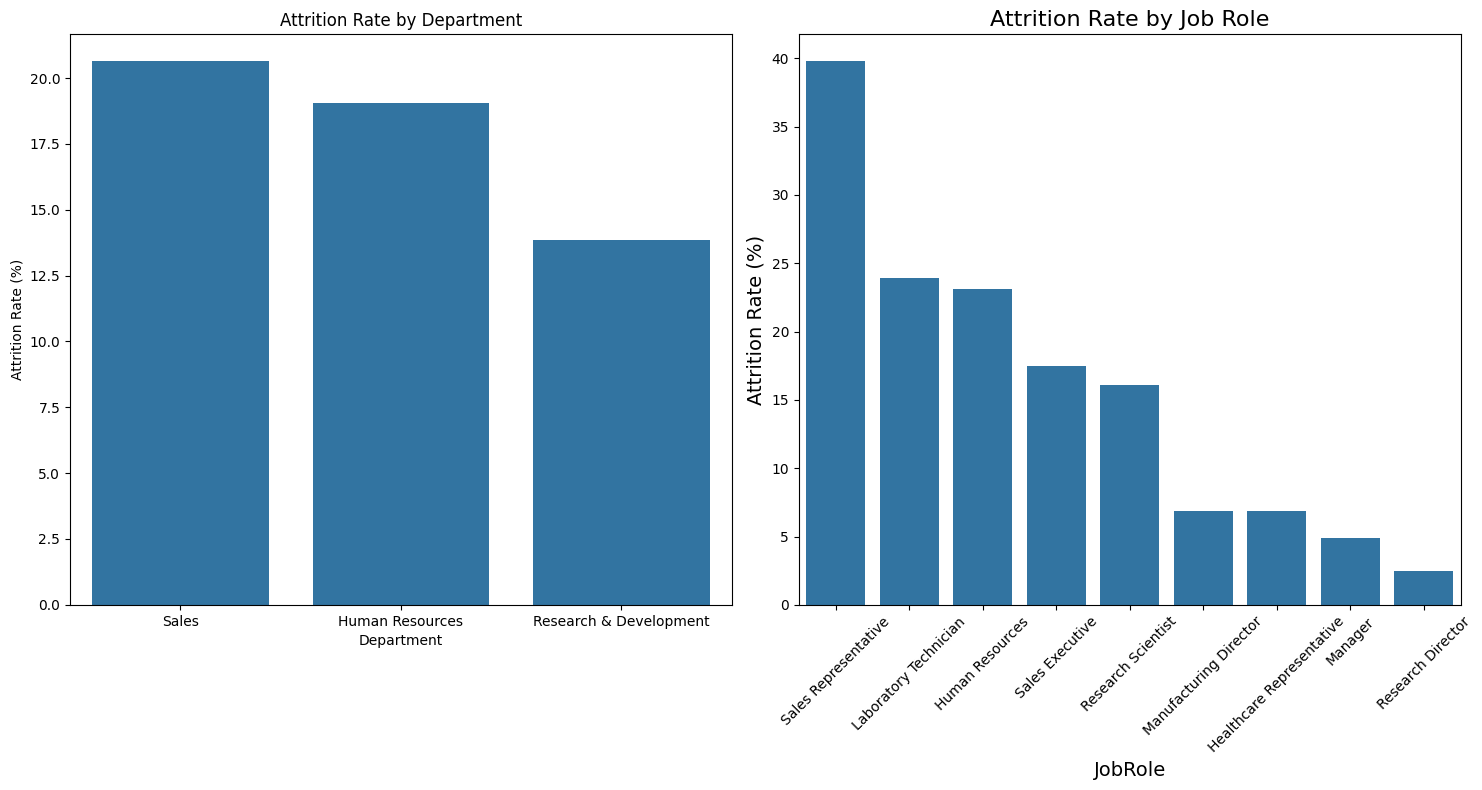

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

# Plot 1: KDE plot of Attrition Rate by Dept
attrition_rate_df = calculate_attrition_rate(data_df1, 'Department')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='Department', y='AttritionRate', ax=axes[0])
axes[0].set_title(f'Attrition Rate by Department')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Attrition Rate (%)')

# Plot 2: Bar plot of Attrition Rate by Job Role
attrition_rate_df = calculate_attrition_rate(data_df1, 'JobRole')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='JobRole', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Job Role',fontsize=16)
axes[1].set_xlabel('JobRole',fontsize=14)
axes[1].set_ylabel('Attrition Rate (%)',fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The sales department and the positions of sales representative and lab technician have high turnover rates. This may be due to factors such as high work pressure, unattainable sales goals, or lack of job satisfaction. The research and development department and the positions of research scientist and research director have low turnover rates. This may be due to the challenging nature of the work, greater opportunities for career development, or a more supportive work environment.

Based on the analysis of the above chart, it can be concluded that the turnover rate is influenced by the department and position held. Employees in the sales department and those holding the positions of sales representative and laboratory technician tend to leave the company more often than employees in the research and development department and those holding the positions of research scientist and research director. This difference may be due to factors such as job pressure, career development opportunities, and job satisfaction

#Exploring what factors strongly affect attrition rate.
#we have our categorical columns we want to explore how important it is to the attrition rate: \
#JobInvolvement, Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Work-Life Balance.

#Hypothesis: It is likely that the "Low" rating within each category will exhibit a higher attrition rate.
#This assumption is based on the notion that these attributes can directly impact an individual's decision to leave the company. 
#They are closely linked to satisfaction with the job involment , work-life balance. etc

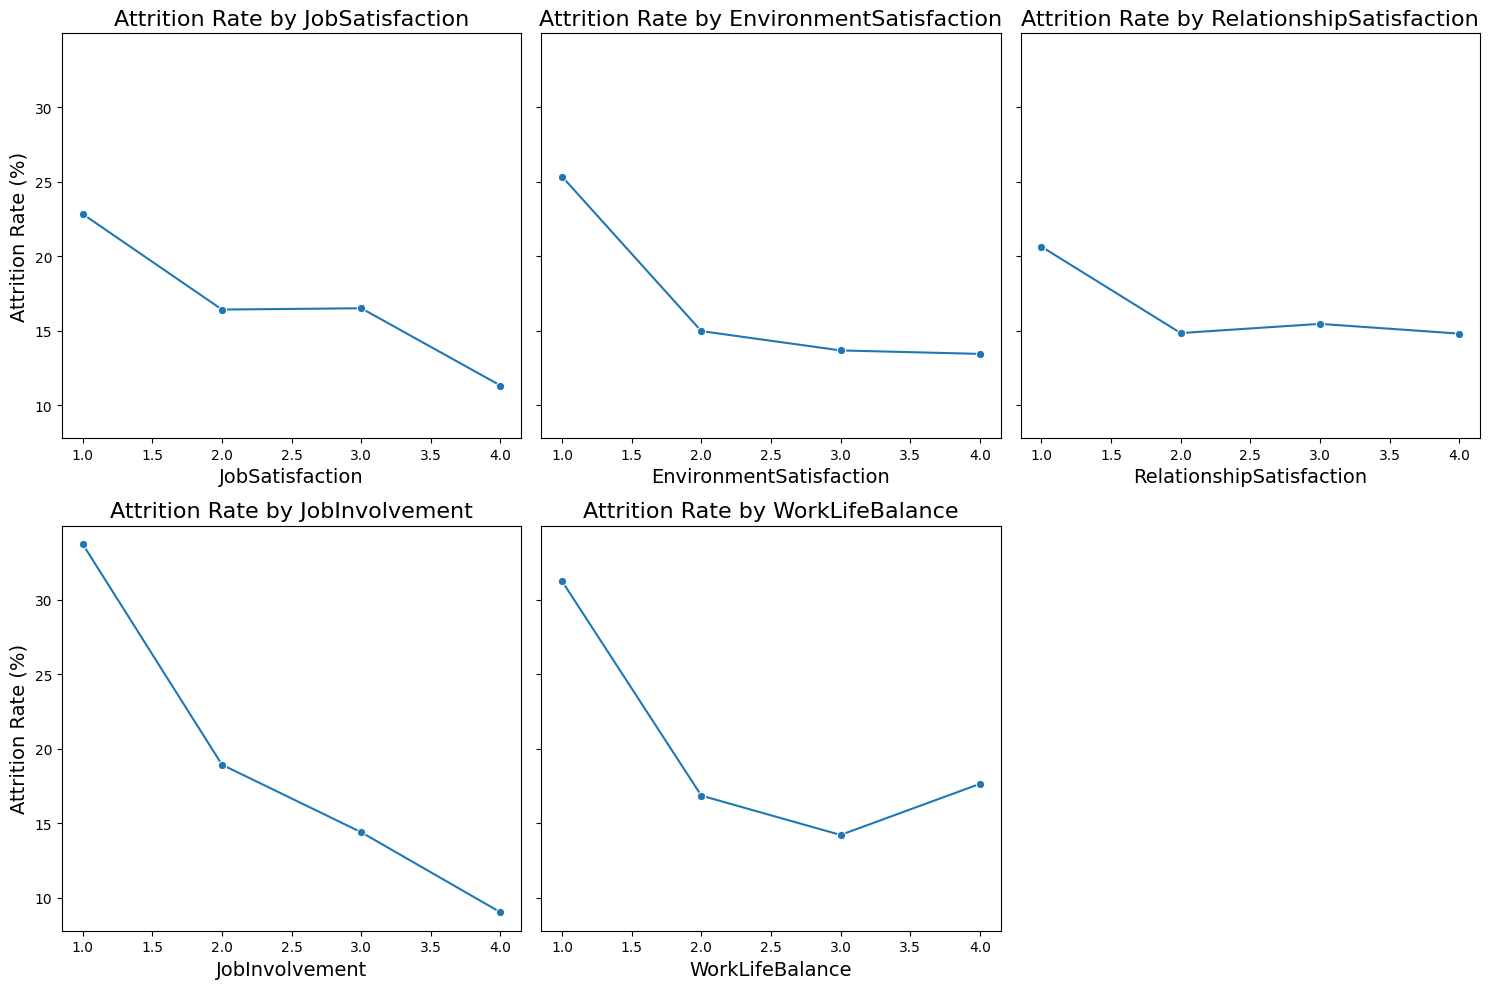

In [19]:
#List of satisfaction related columns
satisfaction_cols = [
    'JobSatisfaction', 'EnvironmentSatisfaction',
    'RelationshipSatisfaction', 'JobInvolvement',
    'WorkLifeBalance'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Flatten axes
axes = axes.flatten()

# Plot indiviually
for i, col in enumerate(satisfaction_cols):
    attrition_rate_df = calculate_attrition_rate(data_df1, col)
    sns.lineplot(data=attrition_rate_df, x=col, y='AttritionRate', marker='o', ax=axes[i])
    axes[i].set_title(f'Attrition Rate by {col}',fontsize=16)
    axes[i].set_xlabel(col,fontsize=14)
    axes[i].set_ylabel('Attrition Rate (%)',fontsize=14)

if len(satisfaction_cols) % 2 != 0:
    fig.delaxes(axes[-1])

# padding between plots
plt.tight_layout()
plt.show()

#EnvironmentSatisfaction affect on the Attrition rate #environment satisfaction strongly related to attrition. when environment satisfaction is low, the employees likely to leave and vice versa #How JobInvolvement affect the attrition rate #when the job involment is high, the attrition is low and vice versa Job Satisfaction: Employees with low levels of job satisfaction tend to leave more often. This suggests that aspects of the job itself, such as tasks, responsibilities, and challenges, strongly influence an employee's decision to stay or leave. Environmental Satisfaction: A work environment that is uncomfortable, unsupportive, or inconsistent with an employee's values may encourage them to seek employment elsewhere. Relationship satisfaction: Good relationships with co-workers and supervisors can increase a sense of belonging and loyalty to the organization, thereby reducing turnover. Job Involvement: Employees who feel engaged in their work tend to be more loyal and committed to the organization. Work-life balance: A good work-life balance is very important to employees. Employees who feel that their work interferes with their personal lives are more likely to leave the company. In addition, the results of the analysis show a strong correlation between the level of job involvement and the level of turnover. Employees with low levels of job involvement tend to leave the organization more frequently. This suggests that a lack of job involvement, which may be caused by a lack of career development opportunities or a lack of challenge in the job, may encourage employees to seek more fulfilling work elsewhere.

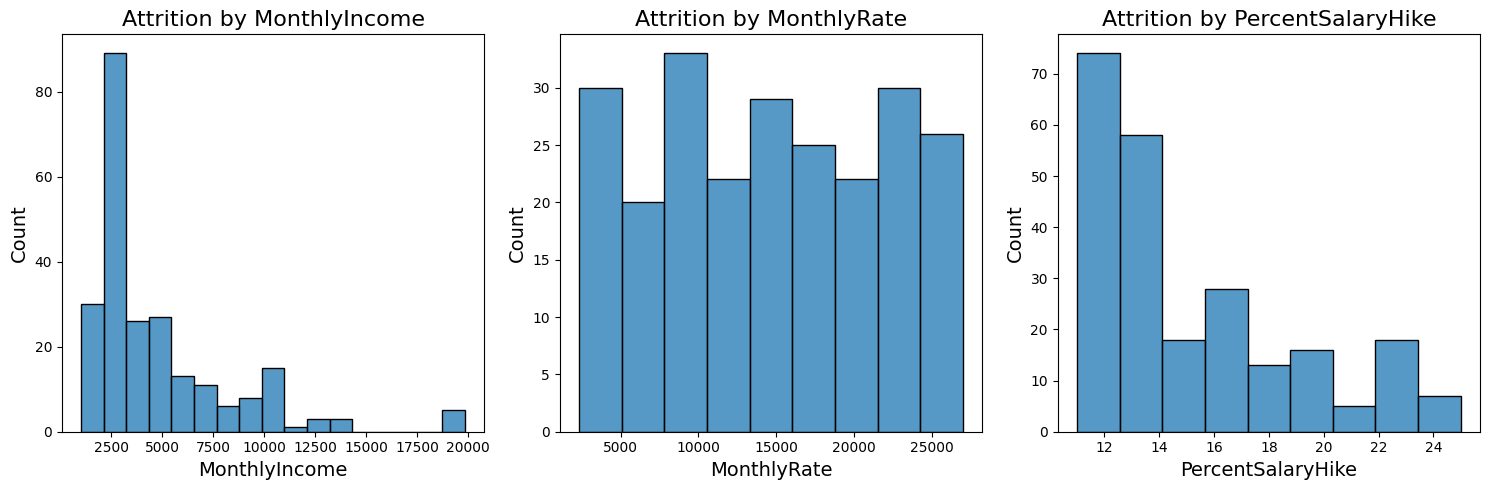

In [20]:
#Let's look at salary and benefit related factors
salary_col = ['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, col in enumerate(salary_col):
    sns.histplot(data=df_attrition, x=col, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}',fontsize=16)
    #axes[i].set_xlabel(col,fontsize=14)
    axes[i].set_xlabel(col,fontsize=14)
    axes[i].set_ylabel('Count',fontsize=14)
    
plt.tight_layout()
plt.show()

Turnover by monthly income

This chart shows that most of the employees who left had a monthly income in the range of 5,000 to 7,500. There is a significant decrease in the turnover rate for employees with a monthly income above 7,500, indicating that employees with higher salaries tend to stay with the company longer. Turnover by Monthly Rate: The Turnover by Monthly Rate graph does not show a clear pattern between salary levels and turnover rates. Turnover fluctuates randomly across different salary ranges.

Turnover by Percent Salary Increase:

This chart shows that employees who receive lower salary increases (below 16%) tend to have higher turnover rates. The higher the percentage increase, the lower the turnover rate. This shows that a significant salary increase can be an effective retention factor.

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

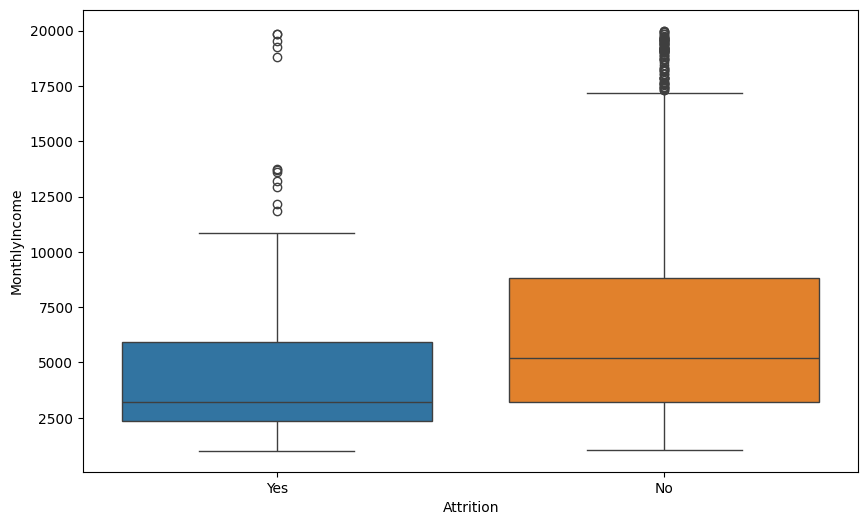

In [21]:
# Plot 1: Box plot of Attrition Rate by Monthly Income

plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',x ='Attrition',data=data_df1,hue="Attrition")

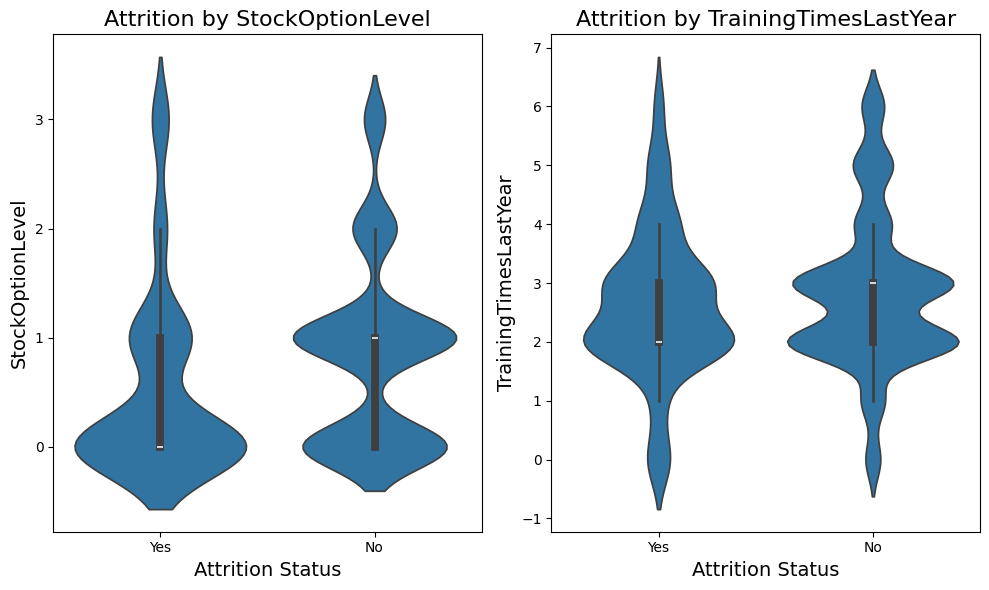

In [22]:
benefit_col = ['StockOptionLevel', 'TrainingTimesLastYear']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

for i, col in enumerate(benefit_col):
    sns.violinplot(data=data_df1, x='Attrition', y=col, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}',fontsize=16)
    axes[i].set_xlabel('Attrition Status',fontsize=14)
    axes[i].set_ylabel(col,fontsize=14)
    
plt.tight_layout()
plt.show()

Stock options have a positive impact on employee retention. Employees who own more shares tend to be more loyal and stay with the company longer. Training opportunities also play an important role in employee retention. Employees who have more training opportunities tend to be happier and more motivated to stay with the company.

#PREPROCESSING THE DATA

#drop unneeded column: Over18, EmployeeCount, EmployeeNumber,and standardHours
#the minimum age is 18,so 'Over18' column can be dropped #The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column #The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well #The 'EmployeeNumber' column is merely the number for each employee, we dont need the column


In [23]:
data_df2=data_df.copy()
data_df2['Attrition']=data_df2['Attrition'].apply(lambda x:0 if x=='No' else 1)
data_df2['Attrition']
#data_df.drop('EmployeeCount',axis=1,inplace=True)


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [24]:
data_df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

data_df.shape

In [25]:
#drop unneeded columns/uniformed columns, useless features
#drop unneeded column: Over18, EmployeeCount, EmployeeNumber,and standardHours 
#the minimum age is 18,so 'Over18' column can be dropped 
#The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column 
#The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well 
#The 'EmployeeNumber' column is merely the number for each employee, we dont need the column
data_df2.drop('EmployeeCount',axis=1,inplace=True)
data_df2.drop('StandardHours',axis=1,inplace=True)
data_df2.drop('EmployeeNumber',axis=1,inplace=True)
data_df2.drop('Over18',axis=1,inplace=True)

In [26]:
data_df2.shape

(1470, 31)

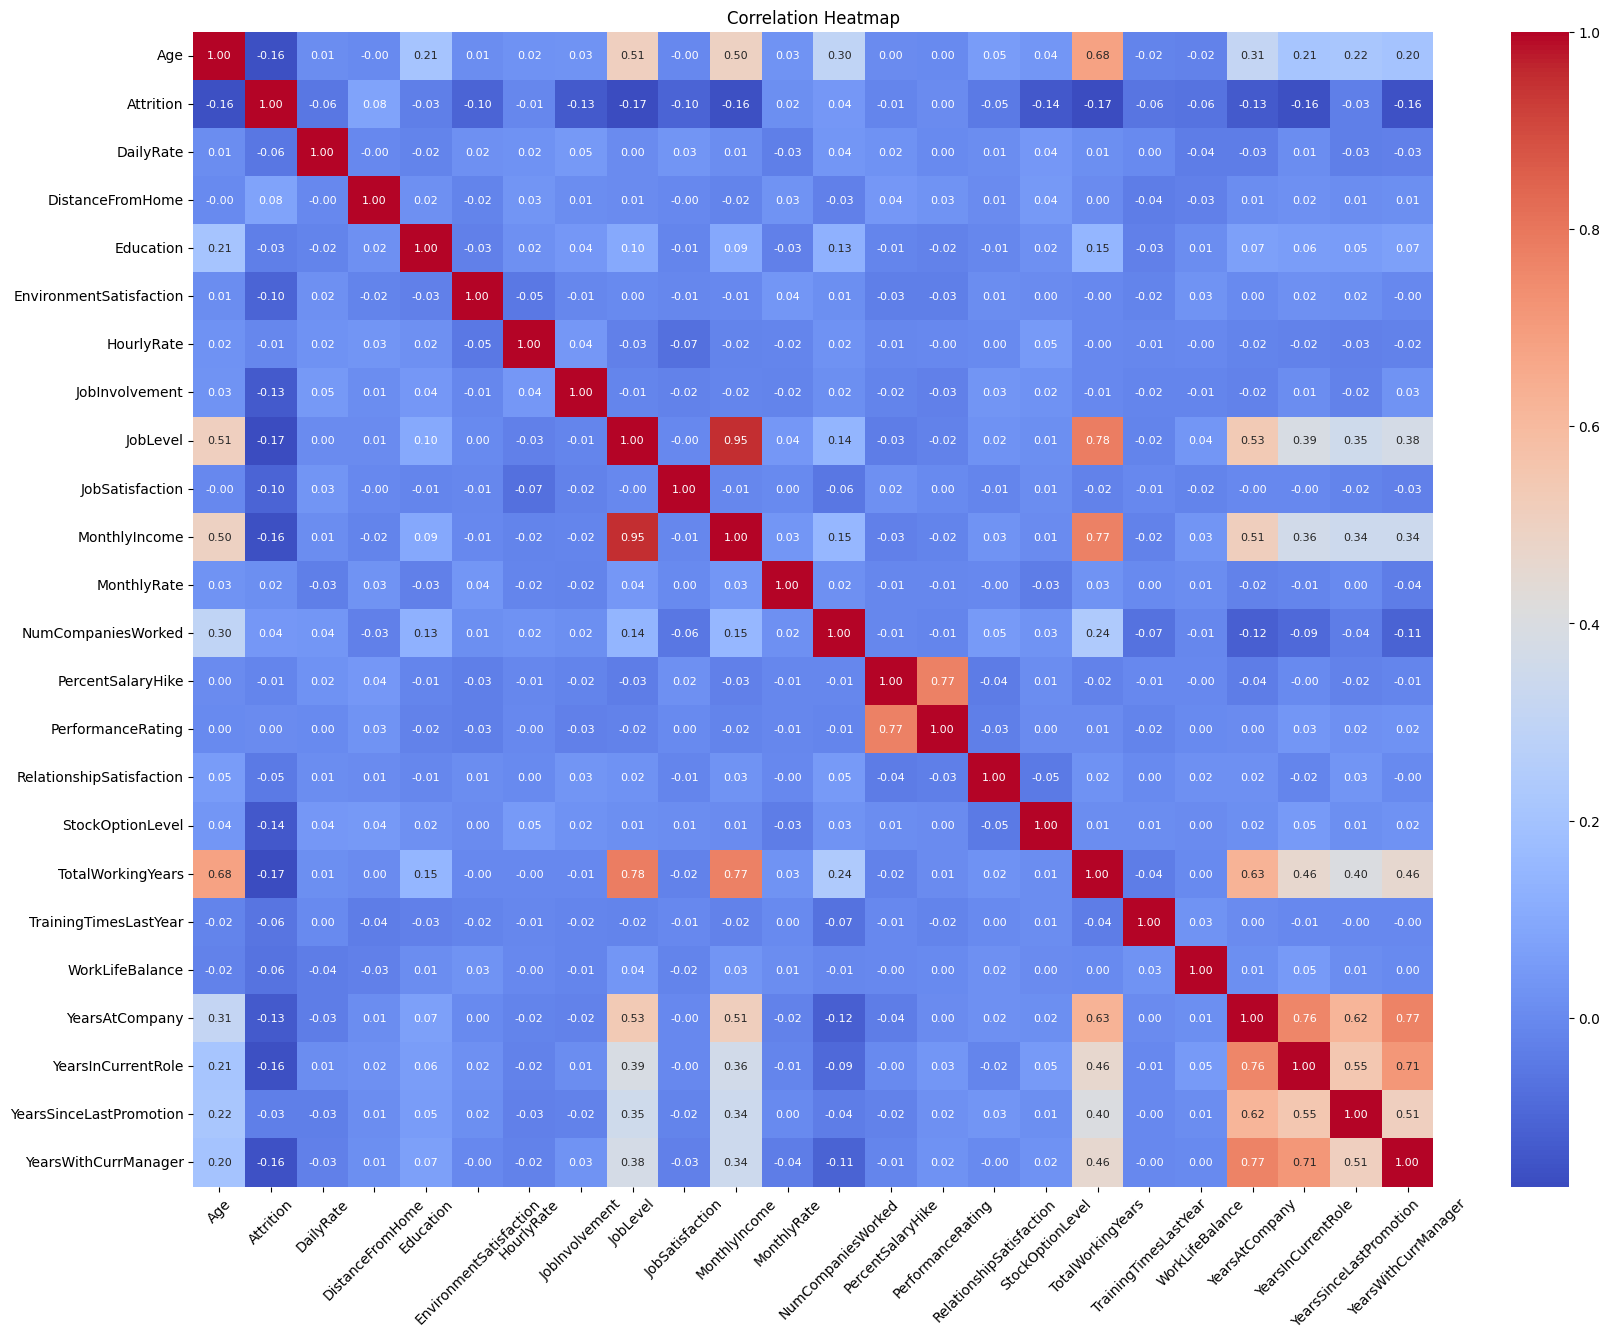

In [27]:
#What are the factors that contribute to Attrition?
#heatmap
corr_matrix=data_df2.loc[:,data_df2.dtypes=='int64'].corr()
plt.figure(figsize=(20, 15))  # Set the size of the heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
ax.set(title='Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

#Multicollinearity: 'MonthlyIncome' is highly correlated with 'JobLevel' (0.95), suggesting that these variables might be conveying overlapping information. 'TotalWorkingYears' has strong positive correlations with 'JobLevel' (0.78) and 'MonthlyIncome' (0.77), which is expected as more experienced employees are likely to have higher job level and earnings. 
"YearsWithCurrManager" has high positive correlation with 'YearsAtCompany'(0.77), and 'YearsInCurrentRole' (0.71) -- this may indicate employees tend to stay with the same manager in the same role.
For the above reason, using cutoff of 0.7 correlation coefficient, the columns MonthlyIncome,TotalWorkingYears, YearsInCurrentRole and YearsWithCurrManager will be removed, and the columns JobLevel and YearsAtCompany will be retained.
It will reduce the possibility of fatures multicollinearity and will improve model accuracy as well

For MonthlyIncome, the high correlation with job level and sensitivity around salary makes it both redundant and hard to work with in policy change management. For TotalWorkingYears, the data will be encapsulated in other features like YearsAtCompany. For YearsInCurrentRole and YearsWithCurrManager, the data will not pose much additional insights beyond YearsAtCompany, considering organisational structures/functional specialisations (e.g. Accounting) are what keep individuals in similar Department and role.

In [28]:
numeric_df = data_df2.select_dtypes(include='number')
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyIncome             1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  NumCompaniesWorked        1470 non-null   int64
 13  PercentSalaryHike         1470 non-null   int64
 14  PerformanceRating         1470 non-null 

<Axes: >

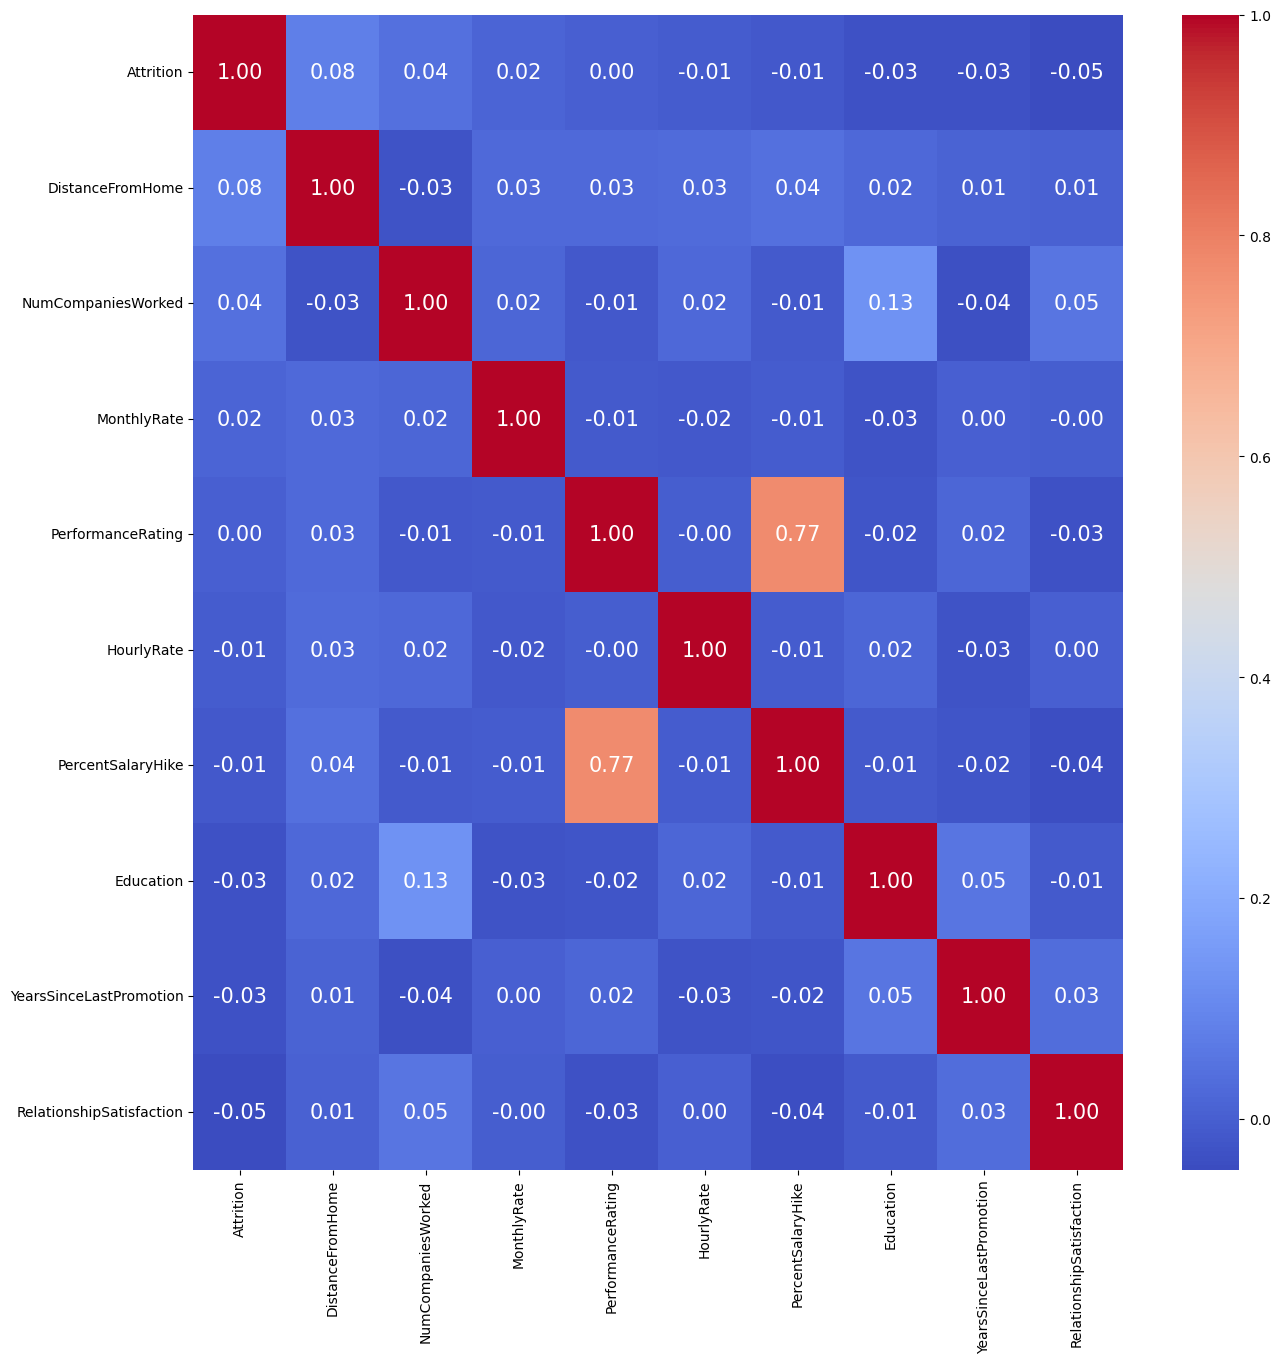

In [29]:
 #Selects 10 features that has the highest correlation to Attrition
col =numeric_df.corr().nlargest(10, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df[col].corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

#these r top 10 factors influencing attrition rate: distanceFromHOme, NumCompaniesWorked, MonthlyRate, PerformanceRating, HourlyRate, PercentSalaryHike,Education,YearsSinceLastPromotion,RelationshipSatisfaction


In [30]:
#Preprocessing, prepare our data for model training

In [31]:
data_df.shape

(1470, 35)

In [32]:
# Transform categorical data into dummies
dummy_col = [column for column in data_df.drop('Attrition', axis=1).columns if data_df[column].nunique() < 30]
data_df = pd.get_dummies(data_df, columns=dummy_col, drop_first=True, dtype='uint8')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 164 entries, Age to YearsWithCurrManager_17
dtypes: int64(8), object(1), uint8(155)
memory usage: 326.0+ KB


In [33]:
data_df.info()
data_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 164 entries, Age to YearsWithCurrManager_17
dtypes: int64(8), object(1), uint8(155)
memory usage: 326.0+ KB


(1470, 164)

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [34]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data_df["Attrition"] = label.fit_transform(data_df.Attrition)

# Adding these dummy variable to input X
X = pd.concat([X, dummy_BusinessTravel,dummy_Department,dummy_EducationField,dummy_Gender,dummy_JobRole,dummy_MaritalStatus,\
dummy_OverTime], axis = 1)


#Model#1 : LOGISTIC REGRESSION
we will first try to build a logistic regression model, which is specifically designed for binary classification problems and the most straightforward model in our case

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [36]:
from sklearn.preprocessing import StandardScaler
#Split data into train and test set
X = data_df.drop('Attrition', axis=1)
y = data_df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify=y)
scaler = StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
X_std=scaler.transform(X)

In [37]:
def evaluate(model,X_train,X_test,y_train,y_test):
    y_test_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    print("TRAINIG RESULTS: \n===============================")
    cl_report=pd.DataFrame(classification_report(y_train,y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{cl_report}")

    print("TESTING RESULTS: \n===============================")
    cl_report=pd.DataFrame(classification_report(y_test,y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{cl_report}")
   
LR_model=LogisticRegression(solver='liblinear')
LR_model.fit(X_train_std,y_train)
evaluate(LR_model,X_train_std,X_test_std,y_train,y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[848  15]
 [ 52 114]]
ACCURACY SCORE:
0.9349
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.942222    0.883721  0.934888     0.912972      0.932785
recall       0.982619    0.686747  0.934888     0.834683      0.934888
f1-score     0.961997    0.772881  0.934888     0.867439      0.931488
support    863.000000  166.000000  0.934888  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[344  26]
 [ 41  30]]
ACCURACY SCORE:
0.8481
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.893506   0.535714  0.848073    0.714610      0.835903
recall       0.929730   0.422535  0.848073    0.676132      0.848073
f1-score     0.911258   0.472441  0.848073    0.691850      0.840610
support    370.000000  71.000000  0.848073  441.000000    441.000000


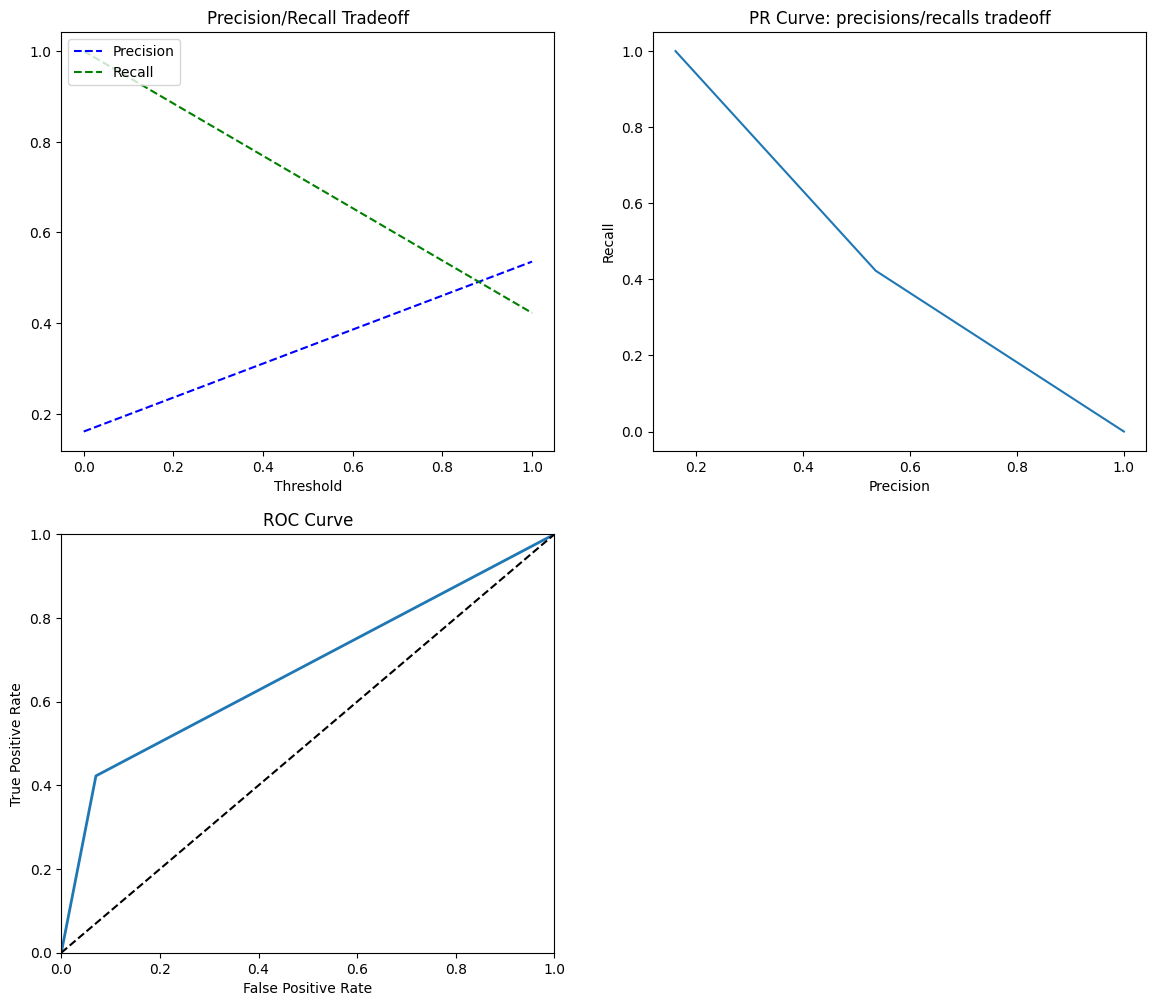

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, LR_model.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, LR_model.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [39]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [40]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, LR_model.predict(X_train)),
        'Test': roc_auc_score(y_test, LR_model.predict(X_test)),
    },
}


✔️ Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100, bootstrap=False)
rf_model.fit(X_train,y_train)
evaluate(rf_model,X_train,X_test,y_train,y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 63   8]]
ACCURACY SCORE:
0.8413
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.852113   0.533333   0.84127    0.692723      0.800790
recall       0.981081   0.112676   0.84127    0.546879      0.841270
f1-score     0.912060   0.186047   0.84127    0.549053      0.795174
support    370.000000  71.000000   0.84127  441.000000    441.000000


In [42]:


#param_grid = dict(
#    n_estimators= [100, 500, 900],     
#    max_features= ['auto', 'sqrt'],
#    max_depth= [2, 3, 5, 10, 15, None], 
#    min_samples_split= [2, 5, 10],
#    min_samples_leaf= [1, 2, 4], 
#    bootstrap= [True, False]
#)


param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_model = RandomForestClassifier(**search.best_params_, random_state=42)
rf_model.fit(X_train, y_train)
evaluate(rf_model, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[366   4]
 [ 68   3]]
ACCURACY SCORE:
0.8367
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.843318   0.428571  0.836735    0.635945      0.776545
recall       0.989189   0.042254  0.836735    0.515721      0.836735
f1-score     0.910448   0.076923  0.836735    0.493685      0.776252
support    370.000000  71.000000  0.836735  441.000000    441.000000


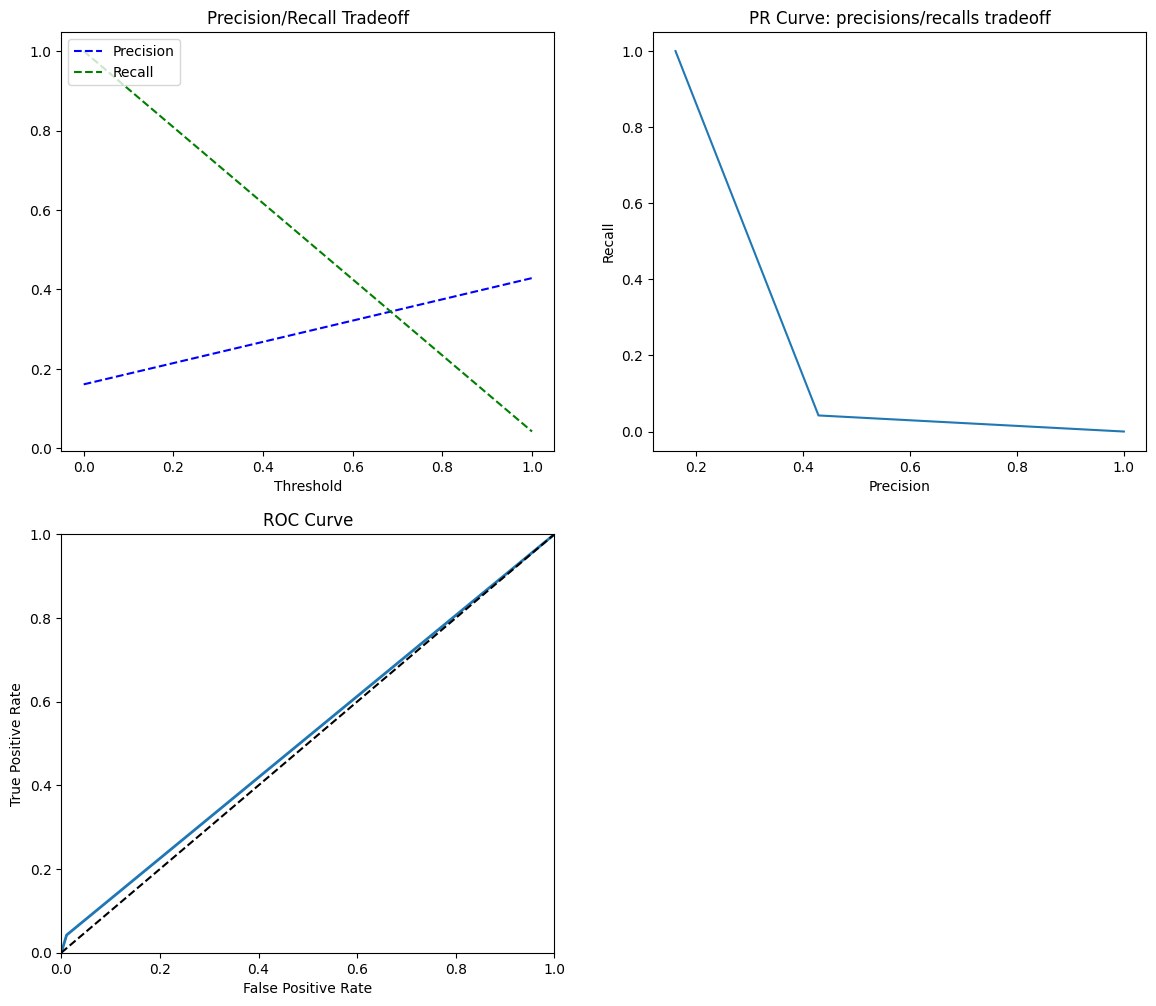

In [43]:
from sklearn.metrics import precision_recall_curve, roc_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_model.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict(X_test))
plot_roc_curve(fpr, tpr)

In [44]:
scores_dict['Random Forest']= {
        'Train': roc_auc_score(y_train, rf_model.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_model.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest Classifier')

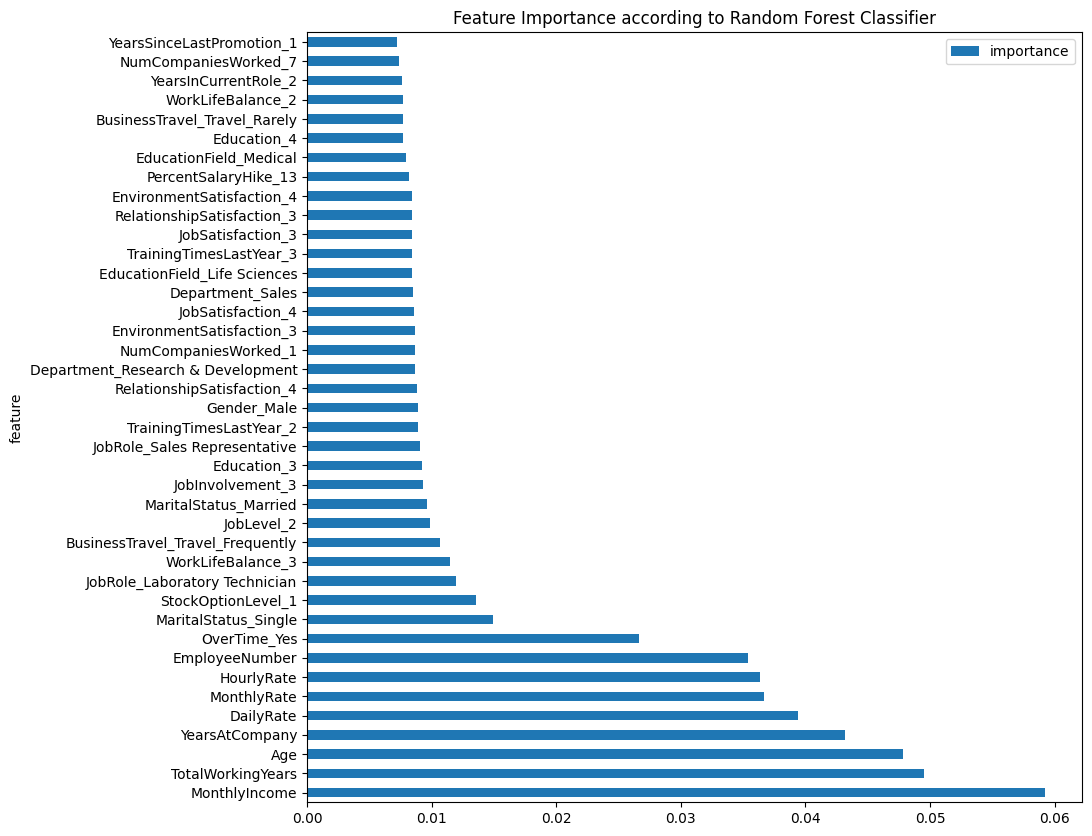

In [45]:
df = feature_imp(X, rf_model)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest Classifier')

In [46]:
#Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_std, y_train)

evaluate(svm_model, X_train_std, X_test_std, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[852  11]
 [ 47 119]]
ACCURACY SCORE:
0.9436
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.947720    0.915385  0.943635     0.931552      0.942503
recall       0.987254    0.716867  0.943635     0.852061      0.943635
f1-score     0.967083    0.804054  0.943635     0.885568      0.940783
support    863.000000  166.000000  0.943635  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[344  26]
 [ 48  23]]
ACCURACY SCORE:
0.8322
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.877551   0.469388    0.8322    0.673469      0.811838
recall       0.929730   0.323944    0.8322    0.626837      0.832200
f1-score     0.902887   0.383333    0.8322    0.643110      0.819240
support    370.000000  71.000000    0.8322  441.000000    441.000000


In [47]:
svm_model = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_model, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [48]:
svm_model = SVC(**search.best_params_)
svm_model.fit(X_train_std, y_train)

evaluate(svm_model, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[862   1]
 [ 60 106]]
ACCURACY SCORE:
0.9407
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.934924    0.990654  0.940719     0.962789      0.943915
recall       0.998841    0.638554  0.940719     0.818698      0.940719
f1-score     0.965826    0.776557  0.940719     0.871192      0.935293
support    863.000000  166.000000  0.940719  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[352  18]
 [ 55  16]]
ACCURACY SCORE:
0.8345
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864865   0.470588  0.834467    0.667727      0.801387
recall       0.951351   0.225352  0.834467    0.588352      0.834467
f1-score     0.906049   0.304762  0.834467    0.605405      0.809243
support    370.000000  71.000000  0.834467  441.000000    441.000000


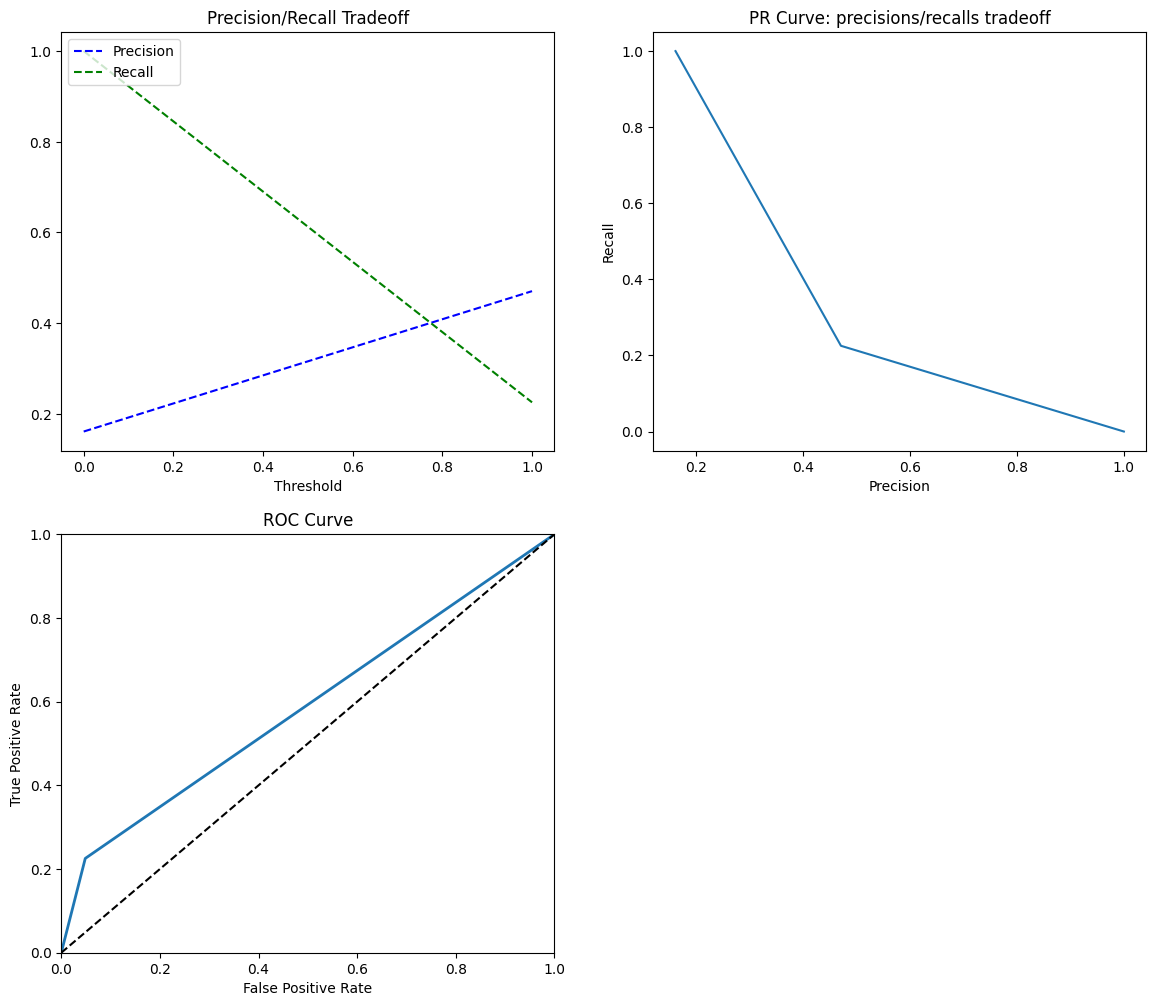

In [49]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_model.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict(X_test_std))
plot_roc_curve(fpr, tpr)


In [50]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_model.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_model.predict(X_test_std)),
    }

In [51]:
#XGBoost Classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

evaluate(xgb_model, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[357  13]
 [ 50  21]]
ACCURACY SCORE:
0.8571
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.877150   0.617647  0.857143    0.747398      0.835371
recall       0.964865   0.295775  0.857143    0.630320      0.857143
f1-score     0.918919   0.400000  0.857143    0.659459      0.835374
support    370.000000  71.000000  0.857143  441.000000    441.000000


conda install -c conda-forge xgboost

In [52]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_model.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_model.predict(X_test)),
}    


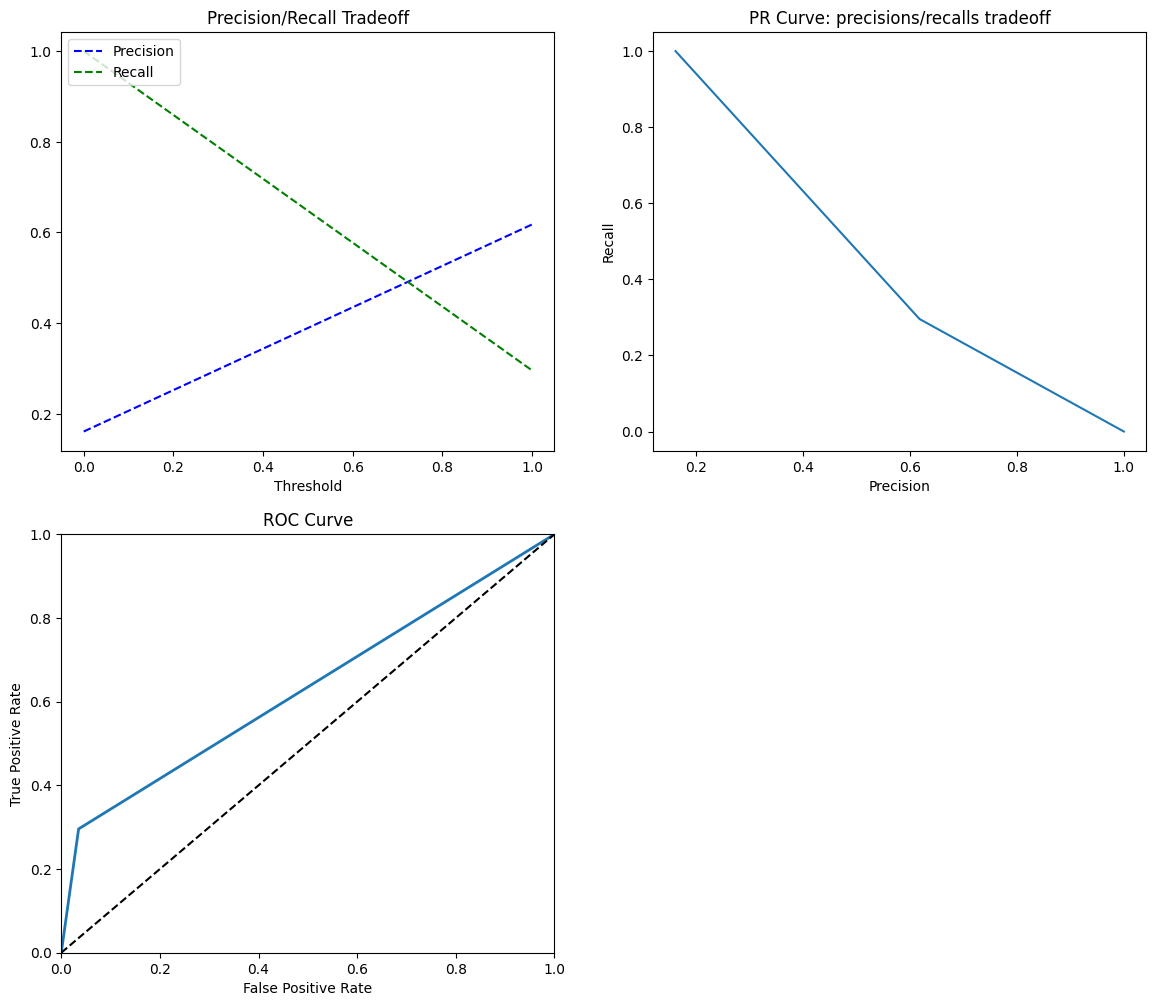

In [53]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_model.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

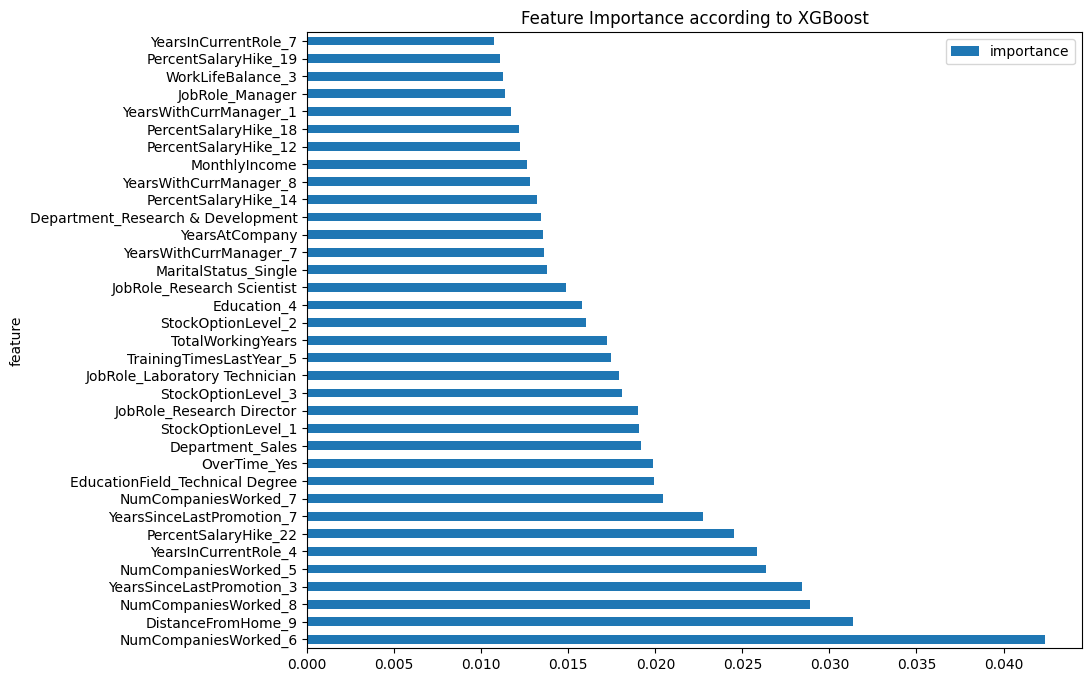

In [54]:
df = feature_imp(X, xgb_model)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

In [59]:
#Models Performance Comparison:
ML_models = {
    'Random Forest': rf_model, 
    'XGBoost': xgb_model, 
    'Logistic Regression': LR_model,
    'Support Vector Machine': svm_model
}

for model in ML_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ML_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.516
XGBOOST                        roc_auc_score: 0.630
LOGISTIC REGRESSION            roc_auc_score: 0.553
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500


<Axes: >

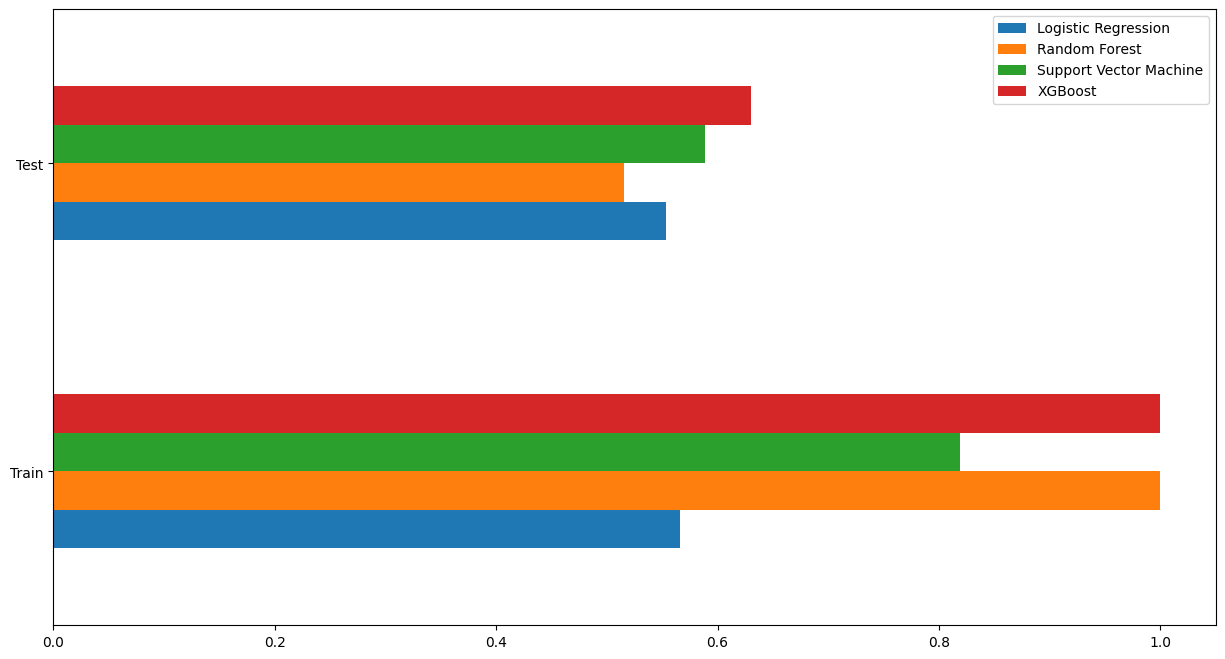

In [62]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))
#scores_df.hvplot.barh()


In [ ]:
pip install hvplot
